<center>
<h1>🌱 Plant Disease Classification using Deep Learning 🍅🌿</h1>

</center>

<center>
<h1>🎯 Project Description</h1>
</center>



In this project, we'll leverage the power of Deep Learning to detect and classify various plant diseases. Specifically, we'll be focusing on diseases in tomato plants.

With climate change and the increasing demand for food production, it's essential to enhance our agricultural practices. Detecting plant diseases early can lead to timely treatment, preventing losses and ensuring better yields. However, manual disease detection can be time-consuming and requires expertise.

Enter Deep Learning! By training a model on images of plant leaves, we can automate the disease detection process, making it more efficient and accessible.

Our dataset contains images of tomato leaves and stucture of my folder is: 

<center>
<h1> I will go through the following steps:</h1>
</center>

* 🔍 Data Exploration - We'll visualize our data and check the distribution of different classes.
* 🧹 Data Preprocessing - We'll load and preprocess our image data to make it suitable for a neural network.
* 🛠 Model Building - We'll build a CNN model using TensorFlow and Keras.
* 🎯 Model Training - We'll train our model on our dataset, using a separate validation set to monitor its performance.
* 📊 Model Evaluation - We'll evaluate our model's performance on a separate test set.
* 🔄 Model Improvement - We'll try different strategies to improve our model's performance.
* 🖼️ Result Visualization - We'll visualize our results to make them interpretable.


In [48]:
# importing data analysis libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# import ML libraries
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [35]:
# Defind paths and constans for the project

# Path
test_path = '../test_split/'
train_path = '../train_split/'

# Constants
BATCH_SIZE = 32
img_height = 180
img_width = 180
AUTOTUNE = tf.data.AUTOTUNE

<center>
<h1> 🔍 Data Exploration</h1>
</center>

### It's a time to load and split data into and see how many pictures and classes do we have:
* Training
* Validation
* Test

In [26]:
# loading training data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size= (img_height, img_width),
    batch_size= BATCH_SIZE
)
train_data
class_names = train_data.class_names
print(f'Number of 🍅 classes names for training set: {class_names}')

Found 899 files belonging to 3 classes.
Using 720 files for training.
Number of 🍅 classes names for training set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [89]:
key = {
    'early': 0,
    'late': 0,
    'healthy': 0
}

for i in train_data:
    for j in i[1]:
        if j == 0:
            key['early'] += 1
        elif j == 1:
            key['late'] += 1
        else:
            key['healthy'] += 1

key

{'early': 157, 'late': 297, 'healthy': 266}

In [27]:
# loading  validation data
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE
)

validation_data
print(f'Number of 🍅 classes names for validation set: {validation_data.class_names}')

Found 899 files belonging to 3 classes.
Using 179 files for validation.
Number of 🍅 classes names for validation set: ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


In [36]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [49]:
# finding all categories belloging to each folder and tomato class

def print_classes(directory, txt = ''):
    categories = os.listdir(directory)
    print(f'Number of classes: {len(categories)}')
    print(f'Classes: {txt}')
    num_of_cat = []
    for category in categories:
        print(f'🍅: {category}')
        num_of_cat.append(category)
    return num_of_cat
        
print_classes(train_path, 'Train')
print('-' * 30)
print_classes(test_path, 'Test')

Number of classes: 3
Classes: Train
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight
------------------------------
Number of classes: 3
Classes: Test
🍅: Tomato___Late_blight
🍅: Tomato___healthy
🍅: Tomato___Early_blight


['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight']

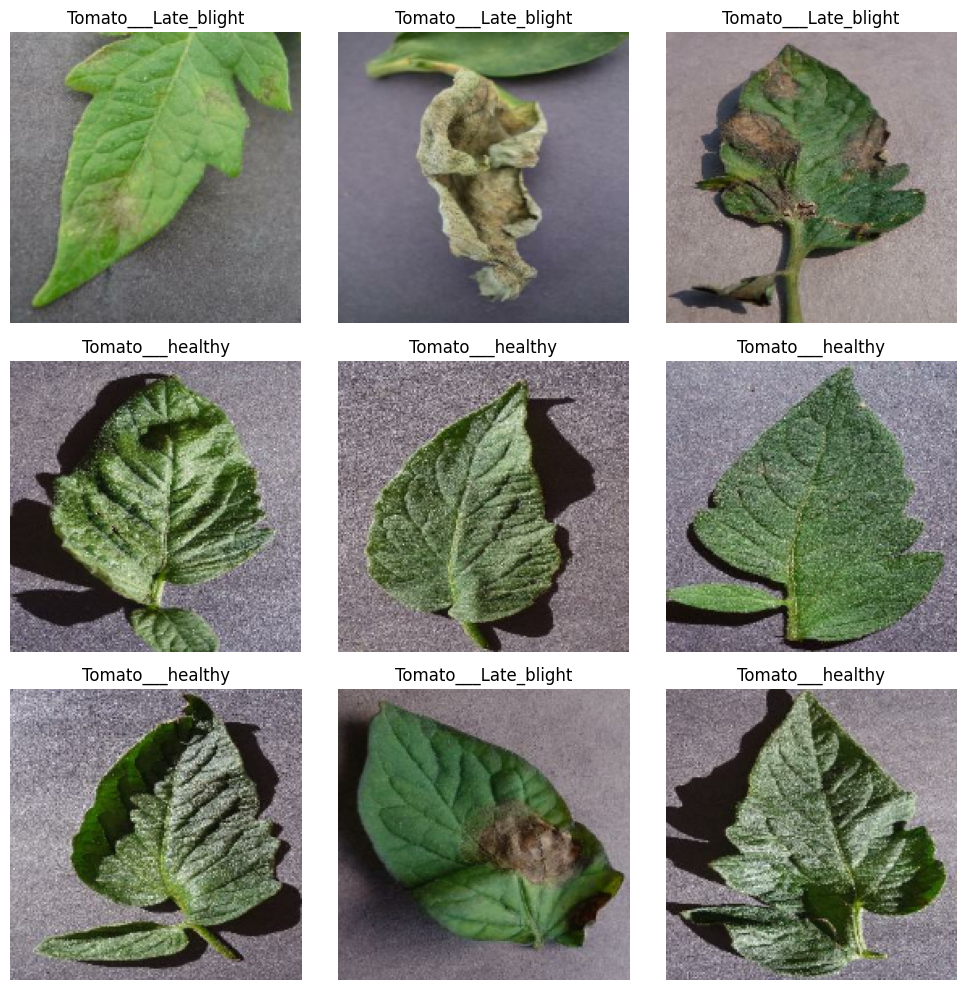

In [30]:
image_batch, label_batch = next(iter(train_data))


fig, axes = plt.subplots(3, 3, figsize = (10, 10))

axes = axes.flatten()

for i in range(9):
    axes[i].imshow(image_batch[i].numpy().astype('uint8'))
    axes[i].set_title(class_names[label_batch[i]])
    
    axes[i].axis('off')

plt.tight_layout()
plt.show()
    

<center>
<h1> 🧹 Data Preprocessing</h1>
</center>

Let's normalize the images. The pixel values are in the [0, 255] range for each of the red, green, and blue channels. We can normalize these values to the [0, 1] range by using a Rescaling layer.

In [46]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_train_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))


print(f'Image: {image_batch[0].numpy()}')
print(f'Lables: {labels_batch}')

Image: [[[0.6212806  0.55461395 0.51574785]
  [0.6149194  0.54825276 0.5170952 ]
  [0.6063835  0.5394989  0.5131373 ]
  ...
  [0.6667127  0.6157323  0.5922029 ]
  [0.6823588  0.6313784  0.607849  ]
  [0.6888468  0.63786644 0.614337  ]]

 [[0.57235587 0.5056892  0.47204795]
  [0.56650114 0.49983445 0.47094557]
  [0.4908061  0.42392156 0.39755994]
  ...
  [0.6996007  0.6486203  0.6250909 ]
  [0.6881177  0.6371373  0.6136079 ]
  [0.670809   0.6198286  0.5962992 ]]

 [[0.49781412 0.43114746 0.3997749 ]
  [0.58450985 0.5178432  0.48895428]
  [0.58966357 0.52277905 0.49641734]
  ...
  [0.7209031  0.6699227  0.6463933 ]
  [0.7134931  0.6625127  0.6389833 ]
  [0.694287   0.6433066  0.6197772 ]]

 ...

 [[0.7061007  0.6355125  0.6198262 ]
  [0.6508801  0.58029187 0.5646056 ]
  [0.57462925 0.504041   0.48835477]
  ...
  [0.74511015 0.6745219  0.6666788 ]
  [0.7298406  0.6592523  0.65140915]
  [0.74174327 0.671155   0.66331184]]

 [[0.58164436 0.5110561  0.49536982]
  [0.56619644 0.49560818 0.479

2023-05-17 15:53:22.277372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [720]
	 [[{{node Placeholder/_4}}]]
2023-05-17 15:53:22.277933: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [720]
	 [[{{node Placeholder/_4}}]]


<center>
<h1> 🛠 Model Building </h1>
</center>

In this step I will initialize a sequential model and then add several layers to it. First, I apply a rescaling layer to normalize the images again. Then I will add several convolutional layers, each followed by a max pooling layer, to extract features from the image data. After all layers defined I will compile model and define early_stopping.

In [68]:
# checking the shape of image before model creation
image_batch.shape[1:]

TensorShape([180, 180, 3])

In [69]:
# Model definition

def initialize_model():
    model = models.Sequential()
    
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape = image_batch.shape[1:]))
    
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

    return model, early_stopping

In [72]:
# initializing model
model, early_stopping = initialize_model()

In [75]:
# Checking the summary for my model 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_26 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

<center>
<h1> 🎯 Model Training </h1>
</center>

In [78]:
# training model

history = model.fit(
    train_data, 
    validation_data = validation_data,
    epochs = 50,
    verbose = 1,
    callbacks = [early_stopping]
)

Epoch 1/50


2023-05-17 16:16:56.967512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [720]
	 [[{{node Placeholder/_4}}]]
2023-05-17 16:16:56.967934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [720]
	 [[{{node Placeholder/_4}}]]


23/23 [==============================] - ETA: 0s - loss: 1.0572 - accuracy: 0.4306

2023-05-17 16:17:08.067357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [179]
	 [[{{node Placeholder/_0}}]]
2023-05-17 16:17:08.068037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [179]
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 12s 477ms/step - loss: 1.0572 - accuracy: 0.4306 - val_loss: 1.0230 - val_accuracy: 0.4469
Epoch 2/50
23/23 [==============================] - 11s 461ms/step - loss: 0.8992 - accuracy: 0.6069 - val_loss: 0.7455 - val_accuracy: 0.7598
Epoch 3/50
23/23 [==============================] - 11s 491ms/step - loss: 0.5433 - accuracy: 0.7583 - val_loss: 0.5370 - val_accuracy: 0.7430
Epoch 4/50
23/23 [==============================] - 13s 558ms/step - loss: 0.4865 - accuracy: 0.7819 - val_loss: 0.5097 - val_accuracy: 0.8045
Epoch 5/50
23/23 [==============================] - 10s 450ms/step - loss: 0.3794 - accuracy: 0.8333 - val_loss: 0.4369 - val_accuracy: 0.8380
Epoch 6/50
23/23 [==============================] - 10s 454ms/step - loss: 0.2749 - accuracy: 0.8778 - val_loss: 0.3557 - val_accuracy: 0.8659
Epoch 7/50
23/23 [==============================] - 11s 486ms/step - loss: 0.2245 - accuracy: 0.9097 - val_loss: 0.2909 - val_accuracy: 0.8827
Epoch 8/50

In [90]:
# checking history params
history.params

{'verbose': 1, 'epochs': 50, 'steps': 23}

In [94]:
# checking history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])